**Notebook:** 
1. Modelling part

In [1]:
# import pandas as pd
# import pyreadstat
# import numpy as np
# import os
# os.getcwd()  # to see the current path of working directory
# pd.set_option('display.max_columns', 40)
# pd.set_option('display.width', -1)
# pd.set_option('display.max_colwidth', 0) # allows to see all the text in the columns 

# ## Load necessary packages:

# import sklearn
# #from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# import statsmodels.api as sm  
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# ## Load necessary packages:
# ## Logit for general logistic regression 
# import sklearn
# #from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# import statsmodels.api as sm  
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import load_iris
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn.model_selection import train_test_split # Import train_test_split function
# from sklearn import metrics
# # from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score
# import os
# import scikitplot as skplt
# #import scikit-plot as skplt
# import matplotlib.pyplot as plt
# import numpy as np
# import statsmodels.api as sm
# from sklearn.metrics import classification_report

In [2]:
!pip install graphviz

import pandas as pd
import pyreadstat
import numpy as np
import os

os.getcwd()  # to see the current path of working directory
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', 0) # allows to see all the text in the columns 

## Load necessary packages:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm  
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import os
import scikitplot as skplt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
# ## Import the clean data: 
# os.chdir("C:/Users/marij/Documents/Master thesis")  
# data_clean = pd.read_csv("data_clean.csv")

# print(data_clean.shape)
# data_clean.head()

In [4]:
#245
os.chdir("C:/Users/marij/Documents/Master thesis/Upload Docs")
os.getcwd() 

data_clean_model = pd.read_csv("Appendix_MariyaHristova_11250_Feb2023_data_for_model.csv")
data_clean_model.shape

(562, 57)

In [5]:
## Import the file with questions and meanings
map_variables = pd.read_csv("C:/Users/marij/Documents/Master thesis/Data/map_variable_question.csv")
map_variables

,Variable,Question,Type of variable,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,q1,1. In the last 10 years have you lived outside of Bulgaria for more than an year?,Binary,NaN,NaN,NaN,NaN
1,q2,2. Which of the following categories do you fall into?,Nominal categorical,NaN,NaN,NaN,NaN
2,q3,3. How many years have you lived abroad? Number,Numeric,NaN,NaN,NaN,NaN
3,q3_rec,3. How many years have you lived abroad?,Ordinal categorical,NaN,NaN,NaN,NaN
4,q4,4. Gender,Binary,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
248,q52_rec,52. How many members does your household consist of?,Numeric,NaN,NaN,NaN,NaN
249,q53,"53. Where do you live? 1 - Capital city , 4 - a village",Ordinal categorical,NaN,NaN,NaN,NaN
250,age_of_entry,Age of migration move (derived),Numeric,NaN,NaN,NaN,NaN
251,return,"Derived from ""Would you return to live in Bulgaria?"" (q27), 1 - Yes and Rather yes, 0 - No and Rather not",Binary,NaN,NaN,NaN,NaN


#  Modelling engine 

In [6]:
data_clean_model.shape

(562, 57)

## Split the X_train and X_train 

In [7]:
data_clean_model.shape

# Split the set into train and test 0.3 is the test set, random splitting 

X_df = pd.DataFrame(data_clean_model.drop("return", axis = 1 ))
y_df = pd.DataFrame(data_clean_model["return"])

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=1)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (393, 56)
Shape of X_test: (169, 56)
Shape of Y_train: (393, 1)
Shape of Y_test: (169, 1)


In [8]:
# # Split the set into train and test 0.3 is the test set, random splitting 

# X_df = pd.DataFrame(data_clean_model.drop("return", axis = 1 ))
# y_df = pd.DataFrame(data_clean_model["return"])

# X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=1)

# print("Shape of X_train:", X_train.shape)
# print("Shape of X_test:", X_test.shape)

# print("Shape of Y_train:", y_train.shape)
# print("Shape of Y_test:", y_test.shape)

### Normalize the numeric features 

In [9]:
numeric_cols = map_variables.loc[(map_variables['Type of variable'] == "Numeric")]["Variable"].tolist()
numeric_cols_1 = data_clean_model.columns[data_clean_model.columns.isin(numeric_cols)].tolist()
print("Number of numeric columns: ", len(numeric_cols_1)) 

Number of numeric columns:  3


In [10]:
# The Xs features should be scaled before a regularized regression # yes, but only numeruc
# We scale also X_test based on X_train 
scaler = StandardScaler()
scaler = scaler.fit(X_train[numeric_cols_1])  
X_train_scaled = scaler.transform(X_train[numeric_cols_1])
X_test_scaled =  scaler.transform(X_test[numeric_cols_1])
print(X_train_scaled)

[[-0.36975282 -0.22660366  0.47746779]
 [-1.07687134 -0.68236231  2.24770214]
 [ 1.46875535  0.68491363 -0.40764939]
 ...
 [-0.93544764  0.04685152 -0.40764939]
 [-0.22832911 -0.40890712 -0.40764939]
 [-1.07687134  0.22915498  1.36258497]]


In [11]:
print(X_train.q5_number.mean()) #35.5 

34.48600508905852


In [12]:
X_train[numeric_cols_1] = X_train_scaled
X_test[numeric_cols_1] = X_test_scaled

# Logistic regression

### Final subset 

In [13]:
### FINAL SUBSET 
df_temp= pd.DataFrame(X_train.T.index)
df_temp.columns = ['Features']
df_temp.head()

final_subset_df = df_temp.merge(map_variables, left_on = 'Features', right_on = 'Variable', how = 'inner')[['Variable', 'Question', "Type of variable"]]
final_subset_df.head()

# Latex 
#print(final_subset_df.to_latex(index = False))

,Variable,Question,Type of variable
0,q10_1,10. Reasons for you to leave Bulgaria - Starting a family / getting married,Binary
1,q10_2,10. Reasons for you to leave Bulgaria - I could not find a job in Bulgaria,Binary
2,q10_7,10. Reasons for you to leave Bulgaria - Lack of perspectives for development,Binary
3,q10_8,"10. Reasons for you to leave Bulgaria - Poor quality of healthcare, education and other public spheres",Binary
4,q10_11,10. Reasons for you to leave Bulgaria - Lack of certain public services,Binary


### Statsmodels

https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit

In [14]:
# Get only the numeric/binary/ categorical features for the up until here cleaned data set. 

binary_cols = map_variables.loc[(map_variables['Type of variable'] == "Binary")]["Variable"].tolist()
binary_cols_1 = X_test.columns[X_test.columns.isin(binary_cols)].tolist() # intersection between the data clean columns and all columns
print("Number of binary columns: ", len(binary_cols_1))

numeric_cols = map_variables.loc[(map_variables['Type of variable'] == "Numeric")]["Variable"].tolist()
numeric_cols_1 = X_test.columns[X_test.columns.isin(numeric_cols)].tolist()
print("Number of numeric columns: ", len(numeric_cols_1)) 

ordinal_categorical_cols = map_variables.loc[(map_variables['Type of variable'] == "Ordinal categorical")]["Variable"].tolist()
ordinal_categorical_cols_1 =  X_test.columns[X_test.columns.isin(ordinal_categorical_cols)].tolist()
print("Number of ordinal categorical columns: ", len(ordinal_categorical_cols_1))

nominal_categorical_cols = map_variables.loc[(map_variables['Type of variable'] == "Nominal categorical")]["Variable"].tolist()
nominal_categorical_cols_1 = X_test.columns[X_test.columns.isin(nominal_categorical_cols)].tolist()
print("Number of nominal categorical columns: ", len(nominal_categorical_cols_1))

print("Number of columns in the table:", X_test.shape[1]) 

Number of binary columns:  38
Number of numeric columns:  3
Number of ordinal categorical columns:  15
Number of nominal categorical columns:  0
Number of columns in the table: 56


In [15]:
# Statsmodels:  " Full model"

## Adiing constants to the already scaled data
#X_train_c = sm.add_constant(X_train.iloc[:,0:84]) # when I change form 68 to 69 it shows the quasi seperation error
X_train_c = sm.add_constant(X_train) # when I change form 68 to 69 it shows the quasi seperation error

#X_test_c = sm.add_constant(X_test.iloc[:,0:84])
X_test_c = sm.add_constant(X_test)

#Note that the first argument here is y, followed by x.
model = sm.Logit(y_train, X_train_c)

#Now, you’ve created your model and you should fit it with the existing data. You do that with .fit() or, if you want to apply L1 regularization, with .fit_regularized():

result = model.fit() # when I use different method for convergenace, it works #method='bfgs'
#result.summary()

#result = sm.GLM(y_train, X_train_c, family=sm.families.Binomial()).fit_regularized(L1_wt=0.0, alpha=0.1)

pred_logit = result.predict(X_test_c)

print('Validation AUC:', roc_auc_score(y_test,pred_logit)) # 0.8811708345266771

result.summary()
#result.params

# https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

Optimization terminated successfully.
         Current function value: 0.338764
         Iterations 8
Validation AUC: 0.8674906582351252


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 return   No. Observations:                  393
Model:                          Logit   Df Residuals:                      336
Method:                           MLE   Df Model:                           56
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.4914
Time:                        00:20:37   Log-Likelihood:                -133.13
converged:                       True   LL-Null:                       -261.77
Covariance Type:            nonrobust   LLR p-value:                 1.411e-27
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            13.0449      3.163      4.124      0.000       6.845      19.244
q10_1                            -0.0912      0.784     -0.116      0.907      -1.627       1.445
q10_2                             3.3633      0.885      3.800      0.000       1.629       5.098
q10_7                             0.6548      0.474      1.381      0.167      -0.274       1.584
q10_8                            -0.9852      0.489     -2.016      0.044      -1.943      -0.027
q10_11                           -3.5847      1.111     -3.228      0.001      -5.761      -1.408
q10_12                           -0.0753      0.553     -0.136      0.892      -1.160       1.009
q10_13                           -0.5580      0.436     -1.278      0.201      -1.413       0.297
q10_14                           -0.5449      0.566     -0.962      0.336      -1.655       0.565
q10_18                            0.4518      0.608      0.743      0.457      -0.739       1.643
q10_19                            0.5929      0.666      0.890      0.373      -0.712       1.898
q13                              -1.2802      0.517     -2.476      0.013      -2.294      -0.267
q14                               2.8901      0.471      6.136      0.000       1.967       3.813
q15_8                            -2.6700      0.825     -3.237      0.001      -4.286      -1.054
q16_2                            -0.1041      0.452     -0.230      0.818      -0.991       0.782
q16_3                            -0.1775      0.515     -0.345      0.730      -1.186       0.831
q16_4                             0.2660      0.428      0.621      0.534      -0.573       1.105
q16_5                             1.4678      0.514      2.854      0.004       0.460       2.476
q16_6                            -0.5768      0.558     -1.034      0.301      -1.670       0.516
q16_9                             1.1825      0.538      2.198      0.028       0.128       2.237
q16_10                           -0.9603      0.598     -1.606      0.108      -2.133       0.212
q16_11                            0.8967      0.602      1.490      0.136      -0.283       2.076
q16_12                           -1.3295      0.585     -2.272      0.023      -2.476      -0.183
q16_13                            0.7965      0.408      1.951      0.051      -0.004       1.597
q9_job                            0.6212      0.476      1.306      0.192      -0.311       1.554
q9_other                         -1.5603      0.801     -1.947      0.052      -3.131       0.010
q19_live_better                  -0.4868      0.459     -1.061      0.289      -1.386       0.413
q21_no_diff_attitude              0.2295      0.625      0.367      0.713      -0.995       1.454
q21_some_extent_diff_attitude     0.5205      0.570      0.914      0.361      -0.596       1.637
q24_no_talk_to_bg_comm           -0.0120      0.620     -0.019      0.985      -1.227       1.203
q24_yes

In [16]:
# # Latex 

# # for table in result.summary().tables:
# #     print(table.as_latex_tabular())

# for table in result.summary().tables:
#     df_result = pd.DataFrame(table)
#     odds_ratio = pd.DataFrame(np.exp(result.params))
#     odds_ratio.columns = [ 'odds_ratio']
    
# df_result["odds ratio"] = [""] + odds_ratio["odds_ratio"].tolist()


# coef_df_col_names = [ '','coef','std err','z','P>|z|','[0.025','0.975]','odds_ratio']
# df_result.columns = coef_df_col_names
# df_result.columns = ['variable',
#        'coef',
#        'std err',
#        'z',
#        'P>|z|',
#        '[0.025',
#        '0.975]',
#        'odds_ratio']
# df_result = df_result.iloc[1:] # removing the first row which is the colunm names 

# ########## TABLE TO LATX #############
# df_result.variable = df_result.variable.astype(str)
# final_subset_df.Variable = final_subset_df.Variable.astype(str)
# df_result.merge(final_subset_df, left_on = 'variable', right_on = 'Variable', how = 'left')[['variable', 'Question' ,'coef', 
#                                                                                              'std err','z','P>|z|','[0.025',
#                                                                                              '0.975]','odds_ratio']]

In [17]:
#pred_logity_test
pred = np.array(pred_logit > 0.5, dtype=float)
confusion_table = np.histogram2d(y_test.iloc[:,0], pred, bins=2)[0]
confusion_table

array([[83., 15.],
       [23., 48.]])

In [18]:
df_conf = pd.DataFrame(confusion_table)
df_conf.columns = ['Predicted as class 0', 'Predicted as class 1']
df_conf.index = ['Actual class 0', 'Actual class 1']
df_conf['Predicted as class 0'] = df_conf['Predicted as class 0'].astype(int)
df_conf['Predicted as class 1'] = df_conf['Predicted as class 1'].astype(int)
print(df_conf.to_latex())
df_conf

\begin{tabular}{lrr}
\toprule
{} &  Predicted as class 0 &  Predicted as class 1 \\
\midrule
Actual class 0 &  83 &  15 \\
Actual class 1 &  23 &  48 \\
\bottomrule
\end{tabular}



C:\Users\marij\AppData\Local\Temp\ipykernel_8884\3907681012.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_conf.to_latex())


,Predicted as class 0,Predicted as class 1
Actual class 0,83,15
Actual class 1,23,48


In [19]:
from sklearn.metrics import classification_report

#print(round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2).to_latex())
round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.78,0.76,0.78,0.77,0.77
recall,0.85,0.68,0.78,0.76,0.78
f1-score,0.81,0.72,0.78,0.77,0.77
support,98.00,71.00,0.78,169.00,169.00


#### Positive and negative coeffiecients

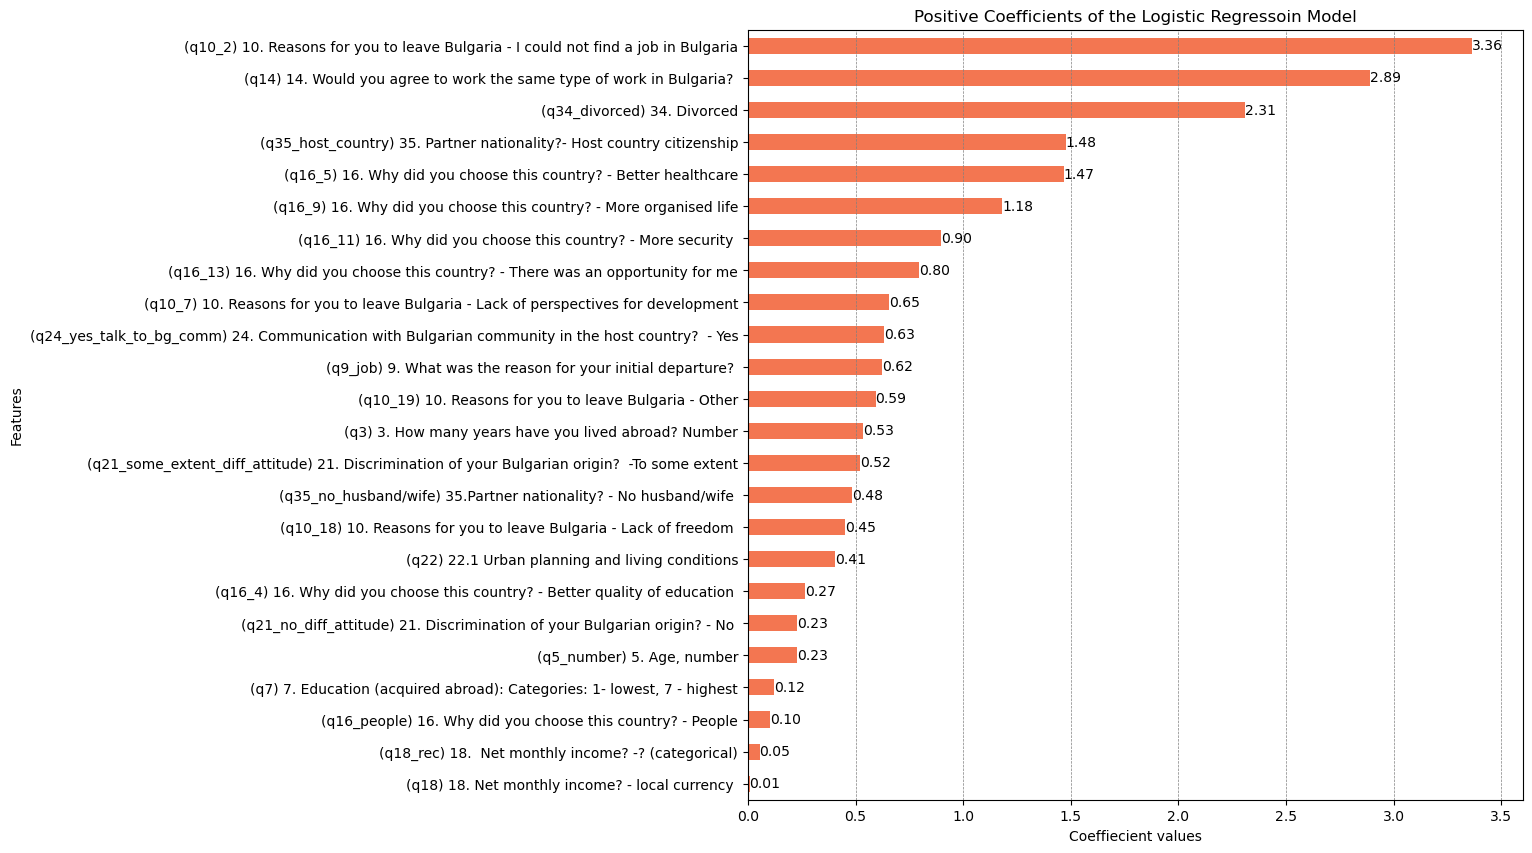

In [20]:
coef_df = pd.DataFrame( { "question": result.params.index, 'coef': result.params }).sort_values(by = 'coef', ascending = False)
coef_df

try_df= coef_df.merge(map_variables, left_on = 'question', right_on = 'Variable', how = 'inner')[["Variable", "Question", "coef"]].sort_values(by = 'coef', ascending = False)
try_df['var_question'] = "("  + try_df['Variable'].astype(str) + ") " + try_df['Question'].astype(str)   

try_df.set_index(try_df['var_question'], inplace = True) 
#try_df.set_index(try_df['Question'], inplace = True) 


# removed the const
imp_coef = try_df['coef'].sort_values(ascending = True) # try_df for full questions # coef_df for only question short 
imp_coef = imp_coef[imp_coef > 0]
plt.figure(figsize=(10, 10))

#matplotlib.rcParams['figure.figsize'] = (8.27, 11.69)
#figsize=(8.27, 11.69)
ax = imp_coef.plot(kind = "barh",
              color=(imp_coef > 0).map({True: '#f37651',False: '#701f57'})
             )

# Adds the values on the bars 
ax.bar_label(ax.containers[0], fmt='%.2f',label_type = 'edge', color = 'black' )

# Plot parameters
plt.title("Positive Coefficients of the Logistic Regressoin Model")
plt.xlabel('Coeffiecient values')
plt.ylabel('Features')
plt.xlim(0,3.6)
plt.yticks(rotation =- 0) 
plt.grid(visible=None, which='major', axis='x', color='grey', linestyle='--', linewidth=0.5) # adds the grid 

#plt.savefig('positive_coef_logit.png', bbox_inches='tight',  dpi=600) 

In [21]:
# print(round(try_df[try_df['coef'] > 0][['Variable',  'coef']],2).to_latex())

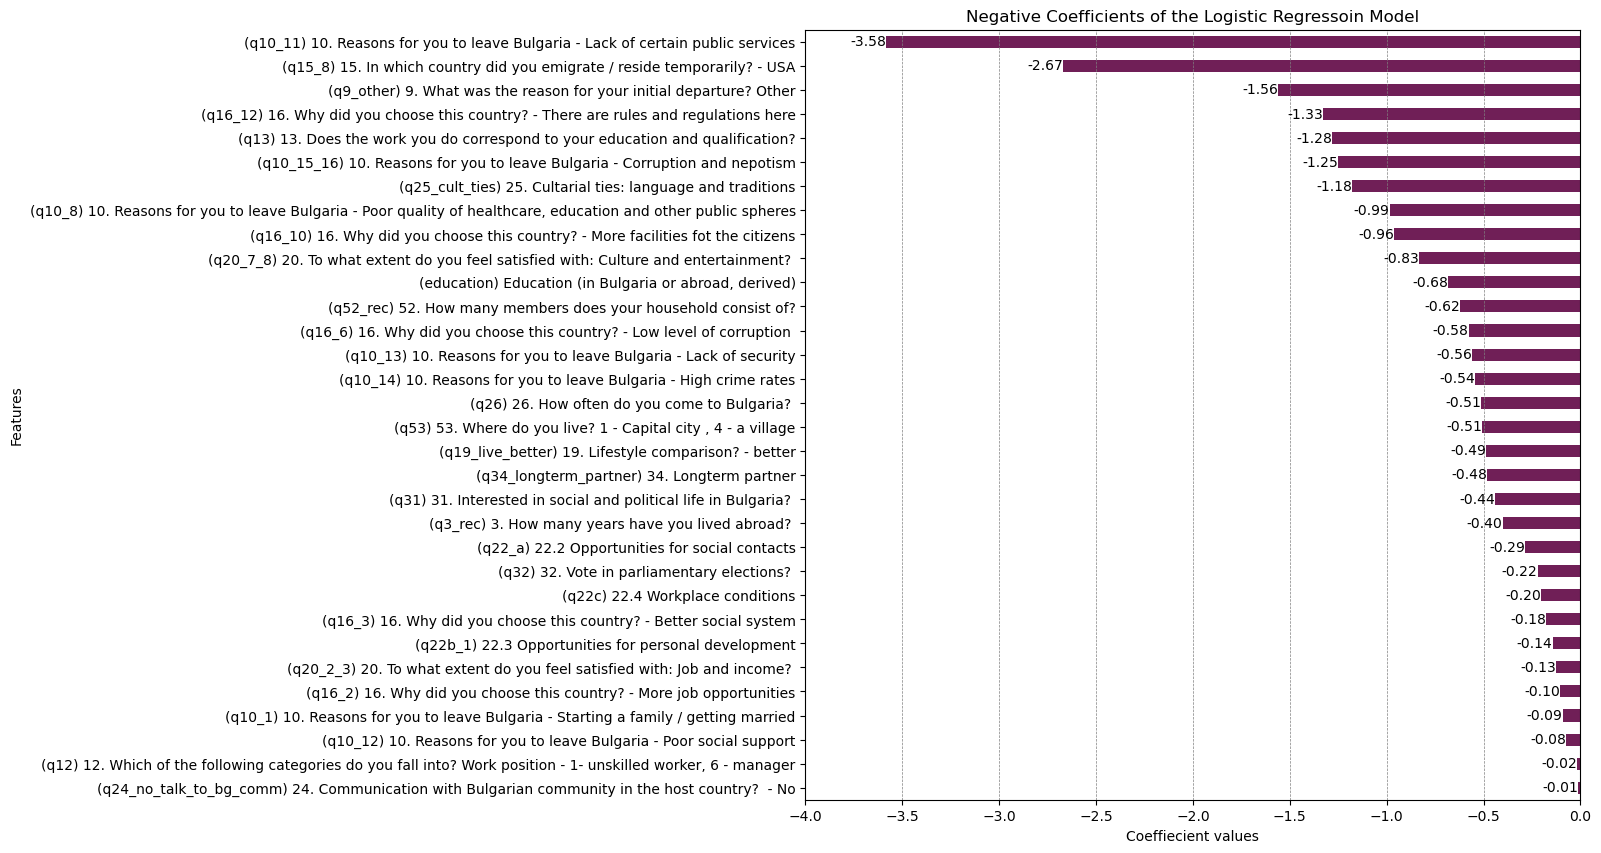

In [22]:
imp_coef = try_df['coef'].sort_values(ascending = False)
imp_coef = imp_coef[imp_coef < 0]
plt.figure(figsize=(10, 10))

#matplotlib.rcParams['figure.figsize'] = (8.27, 11.69)
#figsize=(8.27, 11.69)
ax = imp_coef.plot(kind = "barh",
              color=(imp_coef > 0).map({True: '#f37651',False: '#701f57'})
             )

ax.bar_label(ax.containers[0], fmt='%.2f',label_type = 'edge', color = 'black' )

# Plot parameters
plt.title("Negative Coefficients of the Logistic Regressoin Model")
plt.xlabel('Coeffiecient values')
plt.ylabel('Features')
plt.xlim(-4,0)
plt.grid(visible=None, which='major', axis='x', color='grey', linestyle='--', linewidth=0.5) # adds the grid 

#plt.savefig('negative_coef_logit.png', bbox_inches='tight',  dpi=600) 

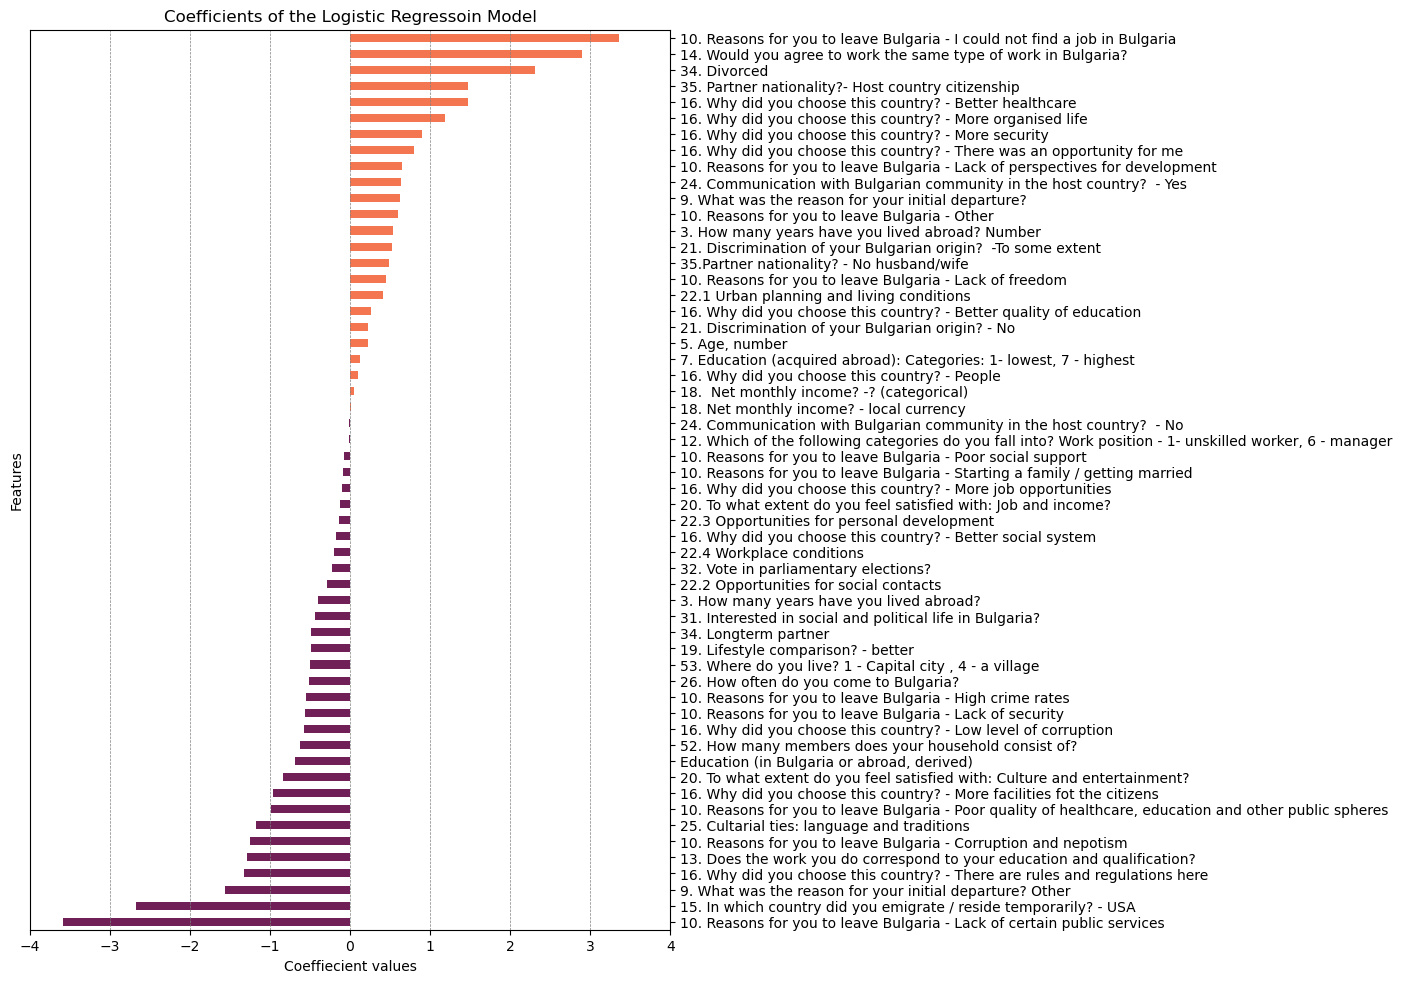

In [23]:
######  PLOT WITH THE ######

coef_df = pd.DataFrame( { "question": result.params.index, 'coef': result.params }).sort_values(by = 'coef', ascending = False)
coef_df

try_df= coef_df.merge(map_variables, left_on = 'question', right_on = 'Variable', how = 'inner')[["Variable", "Question", "coef"]].sort_values(by = 'coef', ascending = False)
try_df.set_index(try_df['Question'], inplace = True)

import seaborn as sns
#sns.set_context("talk") # {paper, notebook, talk, poster}
#sns.set_style("whitegrid")

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True 
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

#imp_coef = x[0].sort_values(ascending = False)
imp_coef = try_df['coef'].sort_values(ascending = True)
import matplotlib
plt.figure(figsize=(8.27, 11.69))
matplotlib.rcParams['figure.figsize'] = (8.27, 11.69)
#figsize=(8.27, 11.69)
imp_coef.plot(kind = "barh",
              color=(imp_coef > 0).map({True: '#f37651',False: '#701f57'})
             )
# Plot parameters
plt.title("Coefficients of the Logistic Regressoin Model")
plt.xlabel('Coeffiecient values')
plt.ylabel('Features')
plt.xlim(-4,4)
plt.grid(visible=None, which='major', axis='x', color='grey', linestyle='--', linewidth=0.5) # adds the grid 

#plt.savefig('feature_importance_logit.png', bbox_inches='tight',  dpi=600) 
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [24]:
# Transform log ratios to probailties
import math 
def logit2prob(logit): 
    odds = math.exp(logit)
    prob = odds / (1 + odds)
    return(prob)

# Get a list with the probabilities
x  = pd.DataFrame(result.params.values) # gets the coefficients from Logit, result is the fiitefd Logit model 
df_log_ratio_prob = pd.DataFrame()
log_ratios_list = []
prob_list = []
for i in range(0, len(x[0])) :
    prob = logit2prob(x[0][i])
    log_ratios_list.append(math.exp(x[0][i]))
    prob_list.append(prob)
    
df_log_ratio_prob["coef"] = x
df_log_ratio_prob["log odds ratios"] = log_ratios_list
df_log_ratio_prob["probabilities"] = prob_list
df_log_ratio_prob.sort_values( by = 'probabilities', ascending = False).head(5)

,coef,log odds ratios,probabilities
0,13.044934,462746.309098,0.999998
2,3.363264,28.883307,0.966537
12,2.890127,17.995603,0.947356
31,2.309513,10.069518,0.909662
33,1.475805,4.374556,0.813938


<Figure size 827x1169 with 0 Axes>

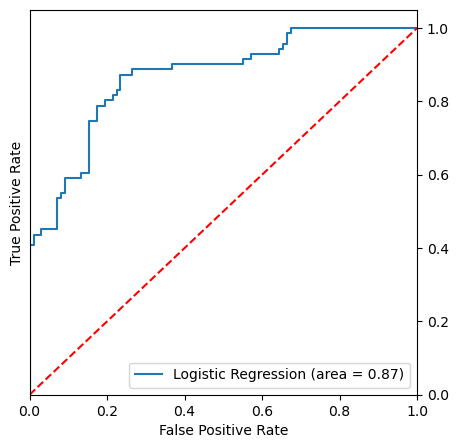

In [25]:
logit_roc_auc = roc_auc_score(y_test, pred_logit)
fpr, tpr, thresholds = roc_curve(y_test, pred_logit)

plt.figure()
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

#plt.savefig("roc_logit.png")
plt.show()


# Backward Elimination 

In [26]:
X_train.shape
X_test.shape

(169, 56)

In [27]:
#Backward Elimination
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

Optimization terminated successfully.
         Current function value: 0.338764
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338765
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338780
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338805
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338831
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338885
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338962
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339065
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339302
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339540
  

In [28]:
# Cols from backward elimination

cols =  selected_features_BE
X_train_1 = X_train[cols]
X_test_1 = X_test[cols]

X_train_c = sm.add_constant(X_train_1) # when I change form 68 to 69 it shows the quasi seperation error
X_test_c = sm.add_constant(X_test_1)

#Note that the first argument here is y, followed by x.
model = sm.Logit(y_train, X_train_c)

#Now, you’ve created your model and you should fit it with the existing data. You do that with .fit() or, if you want to apply L1 regularization, with .fit_regularized():

result = model.fit() # when I use different method for convergenace, it works #method='bfgs'
result.summary()

#result = sm.GLM(y_train, X_train_c, family=sm.families.Binomial()).fit_regularized(L1_wt=0.0, alpha=0.1)

pred_logit = result.predict(X_test_c)

print('Validation AUC:', roc_auc_score(y_test,pred_logit)) # 0.8811708345266771

result.summary()

Optimization terminated successfully.
         Current function value: 0.393914
         Iterations 7
Validation AUC: 0.8276085081920092


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 return   No. Observations:                  393
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                           15
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.4086
Time:                        00:20:42   Log-Likelihood:                -154.81
converged:                       True   LL-Null:                       -261.77
Covariance Type:            nonrobust   LLR p-value:                 3.089e-37
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4758      1.083      5.979      0.000       4.353       8.599
q10_2             2.9258      0.655      4.470      0.000       1.643       4.209
q10_8            -0.9551      0.363     -2.633      0.008      -1.666      -0.244
q10_11           -2.8939      0.850     -3.405      0.001      -4.560      -1.228
q13              -1.1934      0.331     -3.608      0.000      -1.842      -0.545
q14               2.2678      0.337      6.723      0.000       1.607       2.929
q15_8            -1.7232      0.547     -3.148      0.002      -2.796      -0.650
q16_5             0.8684      0.369      2.354      0.019       0.145       1.591
q16_9             0.7856      0.392      2.002      0.045       0.017       1.555
q16_12           -1.2368      0.387     -3.200      0.001      -1.994      -0.479
q34_divorced      1.2600      0.592      2.130      0.033       0.101       2.419
q26              -0.4180      0.114     -3.669      0.000      -0.641      -0.195
q52_rec          -0.5455      0.172     -3.178      0.001      -0.882      -0.209
q20_7_8          -0.8768      0.168     -5.232      0.000      -1.205      -0.548
q10_15_16        -1.3243      0.357     -3.712      0.000      -2.024      -0.625
q25_cult_ties    -1.0446      0.303     -3.450      0.001      -1.638      -0.451
=================================================================================
"""

In [29]:
# #Latex 
# for table in result.summary().tables:
#     print(table.as_latex_tabular())

In [30]:
# Latex 

for table in result.summary().tables:
    df_result = pd.DataFrame(table)
    odds_ratio = pd.DataFrame(np.exp(result.params))
    odds_ratio.columns = [ 'odds_ratio']
    
df_result["odds ratio"] = [""] + odds_ratio["odds_ratio"].tolist()


coef_df_col_names = [ '','coef','std err','z','P>|z|','[0.025','0.975]','odds_ratio']
df_result.columns = coef_df_col_names
df_result.columns = ['variable',
       'coef',
       'std err',
       'z',
       'P>|z|',
       '[0.025',
       '0.975]',
       'odds_ratio']
df_result = df_result.iloc[1:] # removing the first row which is the colunm names 

########## TABLE TO LATX #############
df_result.variable = df_result.variable.astype(str)
final_subset_df.Variable = final_subset_df.Variable.astype(str)
df_result.merge(final_subset_df, left_on = 'variable', right_on = 'Variable', how = 'left')[['variable', 'Question' ,'coef', 
                                                                                             'std err','z','P>|z|','[0.025',
                                                                                             '0.975]','odds_ratio']]

,variable,Question,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio
0,const,NaN,6.4758,1.083,5.979,0.000,4.353,8.599,649.239078
1,q10_2,10. Reasons for you to leave Bulgaria - I could not find a job in Bulgaria,2.9258,0.655,4.470,0.000,1.643,4.209,18.649727
2,q10_8,"10. Reasons for you to leave Bulgaria - Poor quality of healthcare, education and other public spheres",-0.9551,0.363,-2.633,0.008,-1.666,-0.244,0.384774
3,q10_11,10. Reasons for you to leave Bulgaria - Lack of certain public services,-2.8939,0.850,-3.405,0.001,-4.560,-1.228,0.055359
4,q13,13. Does the work you do correspond to your education and qualification?,-1.1934,0.331,-3.608,0.000,-1.842,-0.545,0.303199
5,q14,14. Would you agree to work the same type of work in Bulgaria?,2.2678,0.337,6.723,0.000,1.607,2.929,9.657947
6,q15_8,15. In which country did you emigrate / reside temporarily? - USA,-1.7232,0.547,-3.148,0.002,-2.796,-0.650,0.178493
7,q16_5,16. Why did you choose this country? - Better healthcare,0.8684,0.369,2.354,0.019,0.145,1.591,2.382986
8,q16_9,16. Why did you choose this country? - More organised life,0.7856,0.392,2.002,0.045,0.017,1.555,2.193676
9,q16_12,16. Why did you choose this country? - There are rules and regulations here,-1.2368,0.387,-3.200,0.001,-1.994,-0.479,0.290307


In [31]:
#pred_logity_test
pred = np.array(pred_logit > 0.5, dtype=float)
confusion_table = np.histogram2d(y_test.iloc[:,0], pred, bins=2)[0]
confusion_table

array([[81., 17.],
       [24., 47.]])

In [32]:
print(pd.DataFrame(confusion_table).to_latex())

\begin{tabular}{lrr}
\toprule
{} &     0 &     1 \\
\midrule
0 &  81.0 &  17.0 \\
1 &  24.0 &  47.0 \\
\bottomrule
\end{tabular}



C:\Users\marij\AppData\Local\Temp\ipykernel_8884\1543437845.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(confusion_table).to_latex())


In [33]:
df_conf = pd.DataFrame(confusion_table)
df_conf.columns = ['Predicted as class 0', 'Predicted as class 1']
df_conf.index = ['Actual class 0', 'Actual class 1']
df_conf['Predicted as class 0'] = df_conf['Predicted as class 0'].astype(int)
df_conf['Predicted as class 1'] = df_conf['Predicted as class 1'].astype(int)
print(df_conf.to_latex())
df_conf

\begin{tabular}{lrr}
\toprule
{} &  Predicted as class 0 &  Predicted as class 1 \\
\midrule
Actual class 0 &  81 &  17 \\
Actual class 1 &  24 &  47 \\
\bottomrule
\end{tabular}



C:\Users\marij\AppData\Local\Temp\ipykernel_8884\3907681012.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_conf.to_latex())


,Predicted as class 0,Predicted as class 1
Actual class 0,81,17
Actual class 1,24,47


In [34]:
print(round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2).to_latex())
round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2)

\begin{tabular}{lrrrrr}
\toprule
{} &    0.0 &    1.0 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.77 &  0.73 &  0.76 &  0.75 &  0.76 \\
recall    &  0.83 &  0.66 &  0.76 &  0.74 &  0.76 \\
f1-score  &  0.80 &  0.70 &  0.76 &  0.75 &  0.76 \\
support   &  98.00 &  71.00 &  0.76 &  169.00 &  169.00 \\
\bottomrule
\end{tabular}



C:\Users\marij\AppData\Local\Temp\ipykernel_8884\154011682.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2).to_latex())


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.77,0.73,0.76,0.75,0.76
recall,0.83,0.66,0.76,0.74,0.76
f1-score,0.80,0.70,0.76,0.75,0.76
support,98.00,71.00,0.76,169.00,169.00


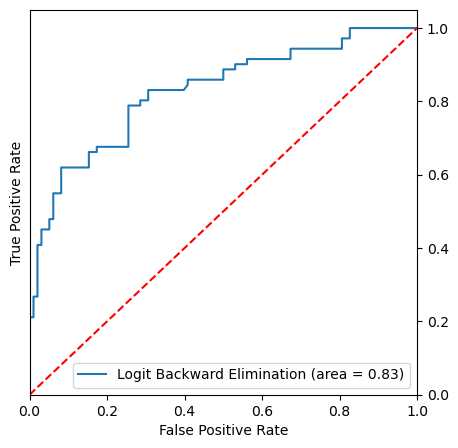

In [35]:
logit_roc_auc = roc_auc_score(y_test, pred_logit)
fpr, tpr, thresholds = roc_curve(y_test, pred_logit)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logit Backward Elimination (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

#plt.savefig("roc_logit_be.png")
plt.show()

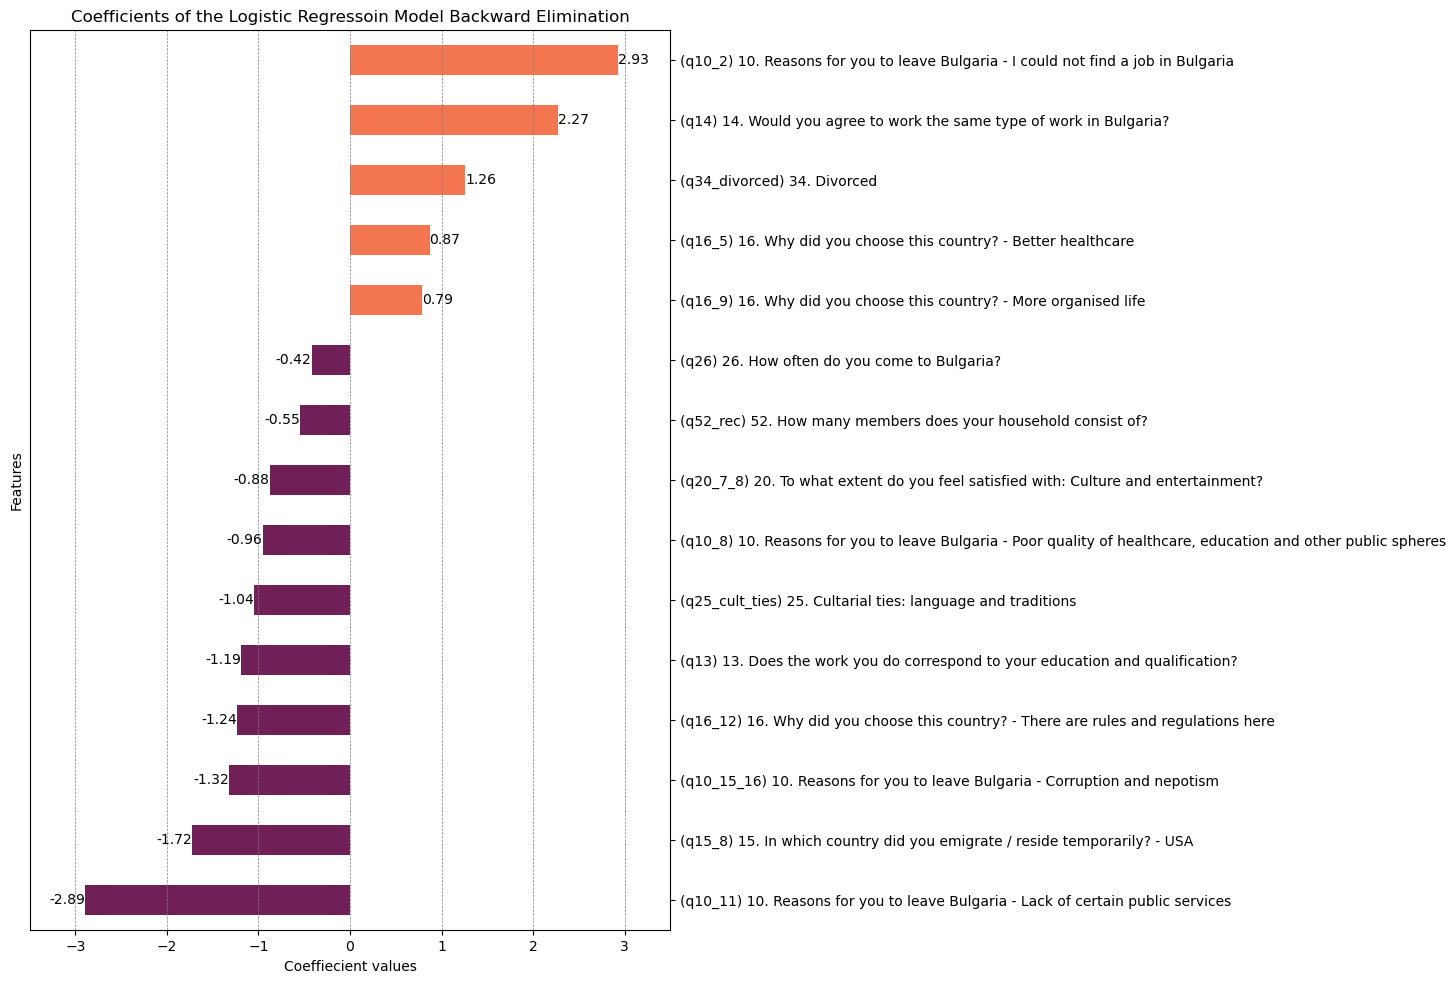

In [36]:
######  PLOT WITH THE ######

coef_df = pd.DataFrame( { "question": result.params.index, 'coef': result.params }).sort_values(by = 'coef', ascending = False)
coef_df

try_df= coef_df.merge(map_variables, left_on = 'question', right_on = 'Variable', how = 'inner')[["Variable", "Question", "coef"]].sort_values(by = 'coef', ascending = False)
#try_df.set_index(try_df['Question'], inplace = True)
try_df['var_question'] = "("  + try_df['Variable'].astype(str) + ") " + try_df['Question'].astype(str)   

try_df.set_index(try_df['var_question'], inplace = True) 

import seaborn as sns
#sns.set_context("talk") # {paper, notebook, talk, poster}
#sns.set_style("whitegrid")

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True 
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

#imp_coef = x[0].sort_values(ascending = False)
imp_coef = try_df['coef'].sort_values(ascending = True)
import matplotlib
plt.figure(figsize=(8.27, 11.69))
matplotlib.rcParams['figure.figsize'] = (8.27, 11.69)
#figsize=(8.27, 11.69)
ax = imp_coef.plot(kind = "barh",
              color=(imp_coef > 0).map({True: '#f37651',False: '#701f57'})
             )
# Plot parameters
plt.title("Coefficients of the Logistic Regressoin Model Backward Elimination")
plt.xlabel('Coeffiecient values')
plt.ylabel('Features')

# Adds the values on the bars 
ax.bar_label(ax.containers[0], fmt='%.2f',label_type = 'edge', color = 'black' )

plt.xlim(-3.5,+3.5)
plt.grid(visible=None, which='major', axis='x', color='grey', linestyle='--', linewidth=0.5) # adds the grid 

#plt.savefig('feature_importance_logit_be.png', bbox_inches='tight',  dpi=600) 

In [37]:
# try_df[["Variable", "Question", "coef"]].merge(columns_df, left_on = 'Variable',  right_on = 'Variable', how = 'inner').sort_values(by = 'coef', ascending = False)

#  Decision tree

In [38]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [39]:
# ## Import the clean data: 
# data_clean = pd.read_csv("data_clean.csv")
# data_clean.shape
# data_clean.head()
# #pd.DataFrame(data_clean.columns)

# # Remove all rows where q27 is missing 
# data_clean = data_clean[data_clean['q27'].notna()] ### before: 674, after 562 rows, 112 missing rows

# # Drop the question that the target variable is based on 
# data_clean = data_clean.drop('q27', axis = 1)

In [40]:
data_clean = data_clean_model
data_clean.shape

(562, 57)

In [41]:
# X_df = pd.DataFrame(data_clean_model.drop("return", axis = 1 ))
# y_df = pd.DataFrame(data_clean_model["return"])

# #X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=1)

# X_train = X_train_clean
# X_test = X_test_clean

In [42]:
X_train_clean = X_train
X_test_clean = X_test

In [43]:
# X_train_clean.shape

In [44]:
#X_train_clean.columns.to_list()

In [45]:
X_train_clean.shape

(393, 56)

## Parameter tuning 

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

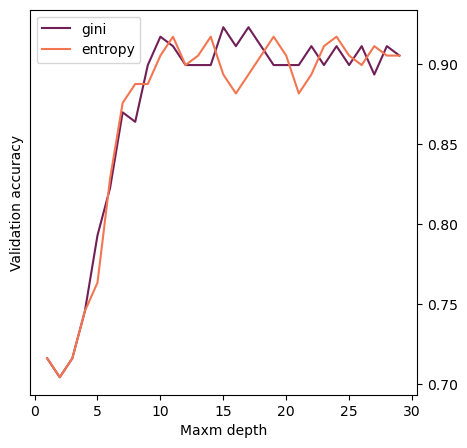

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
plt.figure(figsize=(5,5))
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion= "gini", max_depth=i)
    dtree.fit(X_train_clean, y_train)
    pred = dtree.predict(X_test_clean)
    acc_gini.append(accuracy_score(y_test, pred))
 ####
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dtree.fit(X_train_clean, y_train)
    pred = dtree.predict(X_test_clean)
    acc_entropy.append(accuracy_score(y_test, pred))
 ####
    max_depth.append(i)
    d = pd.DataFrame({"acc_gini":pd.Series(acc_gini), "acc_entropy":pd.Series(acc_entropy),
                                         "max_depth":pd.Series(max_depth)})# visualizing changes in parameters
    
plt.plot("max_depth","acc_gini", data=d, label="gini", color =  '#701f57')
plt.plot("max_depth","acc_entropy", data=d, label="entropy", color = '#f37651')
plt.xlabel("Maxm depth")
plt.ylabel("Validation accuracy")
plt.legend()


# colors 
#['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']

# map({True: '#f37651',False: '#701f57'})

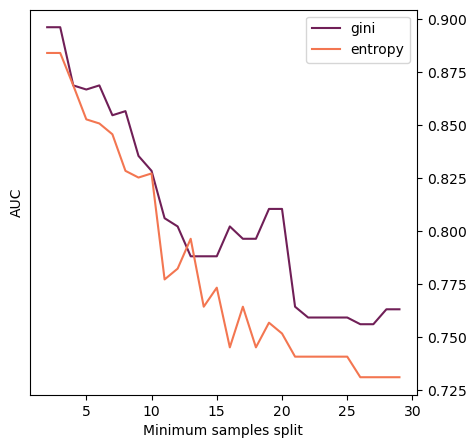

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
plt.figure(figsize=(5,5))
min_samples_split = []
acc_gini = []
acc_entropy = []
auc_gini = []
auc_entropy = []
for i in range(2,30):
    dtree = DecisionTreeClassifier(criterion= "gini", min_samples_split=i)
    dtree.fit(X_train_clean, y_train)
    pred = dtree.predict(X_test_clean)
    acc_gini.append(accuracy_score(y_test, pred))
    auc_gini.append(roc_auc_score(y_test, pred))
 ####
    dtree = DecisionTreeClassifier(criterion="entropy", min_samples_split=i)
    dtree.fit(X_train_clean, y_train)
    pred = dtree.predict(X_test_clean)
    acc_entropy.append(accuracy_score(y_test, pred))
    auc_entropy.append(roc_auc_score(y_test, pred))
 ####
    min_samples_split.append(i)
    d = pd.DataFrame({"acc_gini":pd.Series(acc_gini), "acc_entropy":pd.Series(acc_entropy), "auc_gini":pd.Series(auc_gini), "auc_entropy":pd.Series(auc_entropy), 
                                         "min_samples_split":pd.Series(min_samples_split)})# visualizing changes in parameters
    
#plt.plot("min_samples_split","acc_gini", data=d, label="gini", color =  '#701f57')
#plt.plot("min_samples_split","acc_entropy", data=d, label="entropy", color = '#f37651')
plt.plot("min_samples_split","auc_gini", data=d, label="gini", color =  '#701f57')
plt.plot("min_samples_split","auc_entropy", data=d, label="entropy", color = '#f37651')
plt.xlabel("Minimum samples split")
#plt.ylabel("Validation accuracy")
plt.ylabel("AUC")
plt.legend()

The depth-10 tree achieves the best mean cross-validation roc_auc 88.31792 +/- 9.769% on training dataset


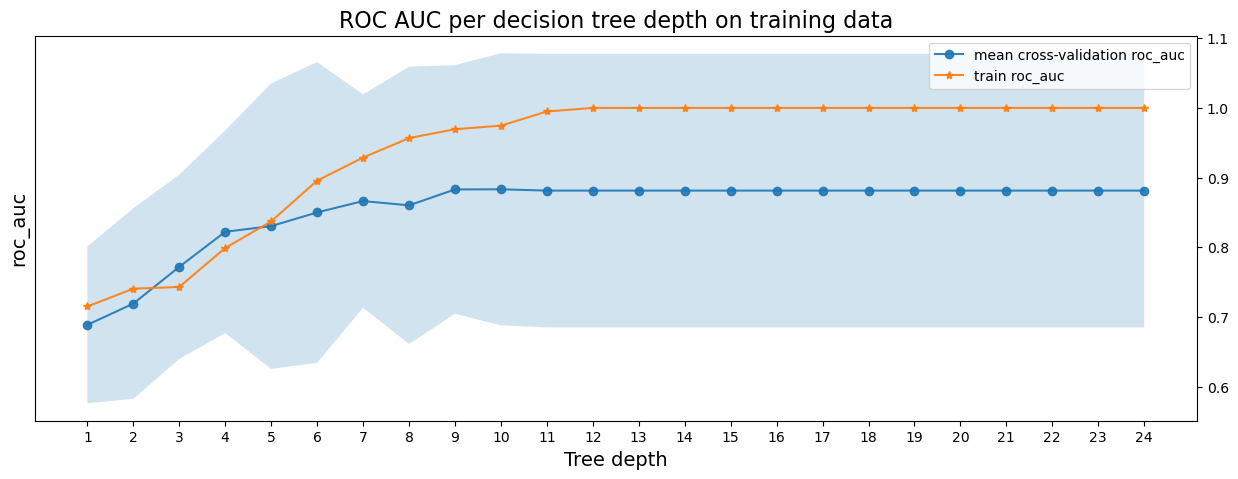

In [48]:
#https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6
#https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X_train_clean,y_train, tree_depths, cv=10, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth, class_weight = "balanced",  random_state = 42)
        cv_scores = cross_val_score(tree_model,X_train_clean,y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X_train_clean,y_train).score(X_train_clean,y_train))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation roc_auc', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train roc_auc', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('roc_auc', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train_clean,y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'ROC AUC per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation roc_auc {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))
plt.savefig('auc_roc_tree_depth.png', bbox_inches='tight',  dpi=600)
#4 tree depth

The min-split 14 tree achieves the best mean cross-validation roc_auc 89.79285 +/- 8.7738% on training dataset


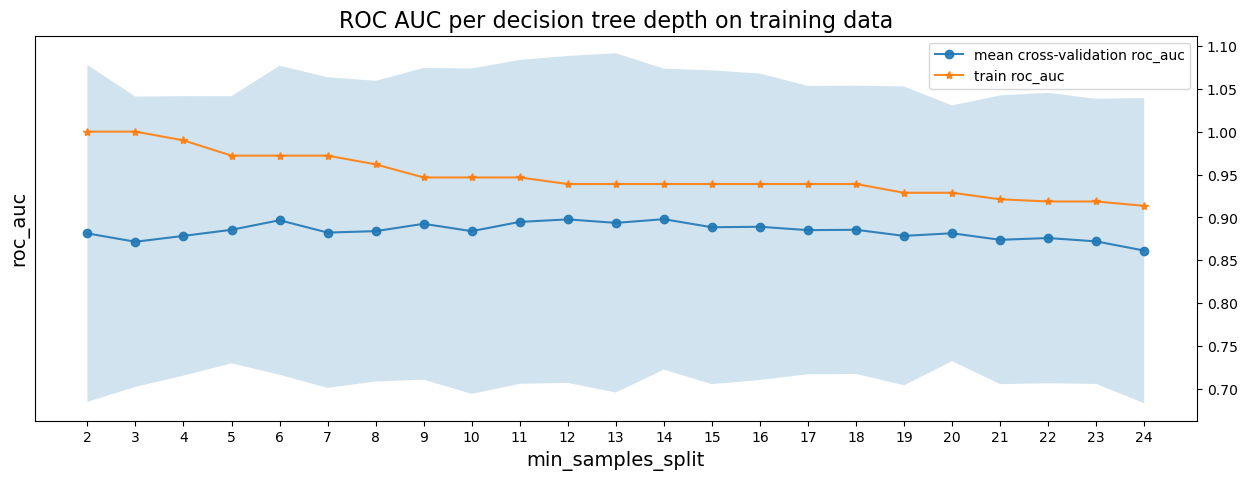

In [49]:
#https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X_train_clean,y_train, tree_depths, cv=10, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(min_samples_split=depth, class_weight = "balanced", random_state = 42)
        cv_scores = cross_val_score(tree_model,X_train_clean,y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X_train_clean,y_train).score(X_train_clean,y_train))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation roc_auc', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train roc_auc', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('min_samples_split', fontsize=14)
    ax.set_ylabel('roc_auc', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(2,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train_clean,y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'ROC AUC per decision tree depth on training data')

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The min-split {} tree achieves the best mean cross-validation roc_auc {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))
plt.savefig('auc_roc_min_sample_split.png', bbox_inches='tight',  dpi=600)

## Fit the model 

Validation accuracy: 0.7396449704142012
Validation AUC: 0.7386461626904284


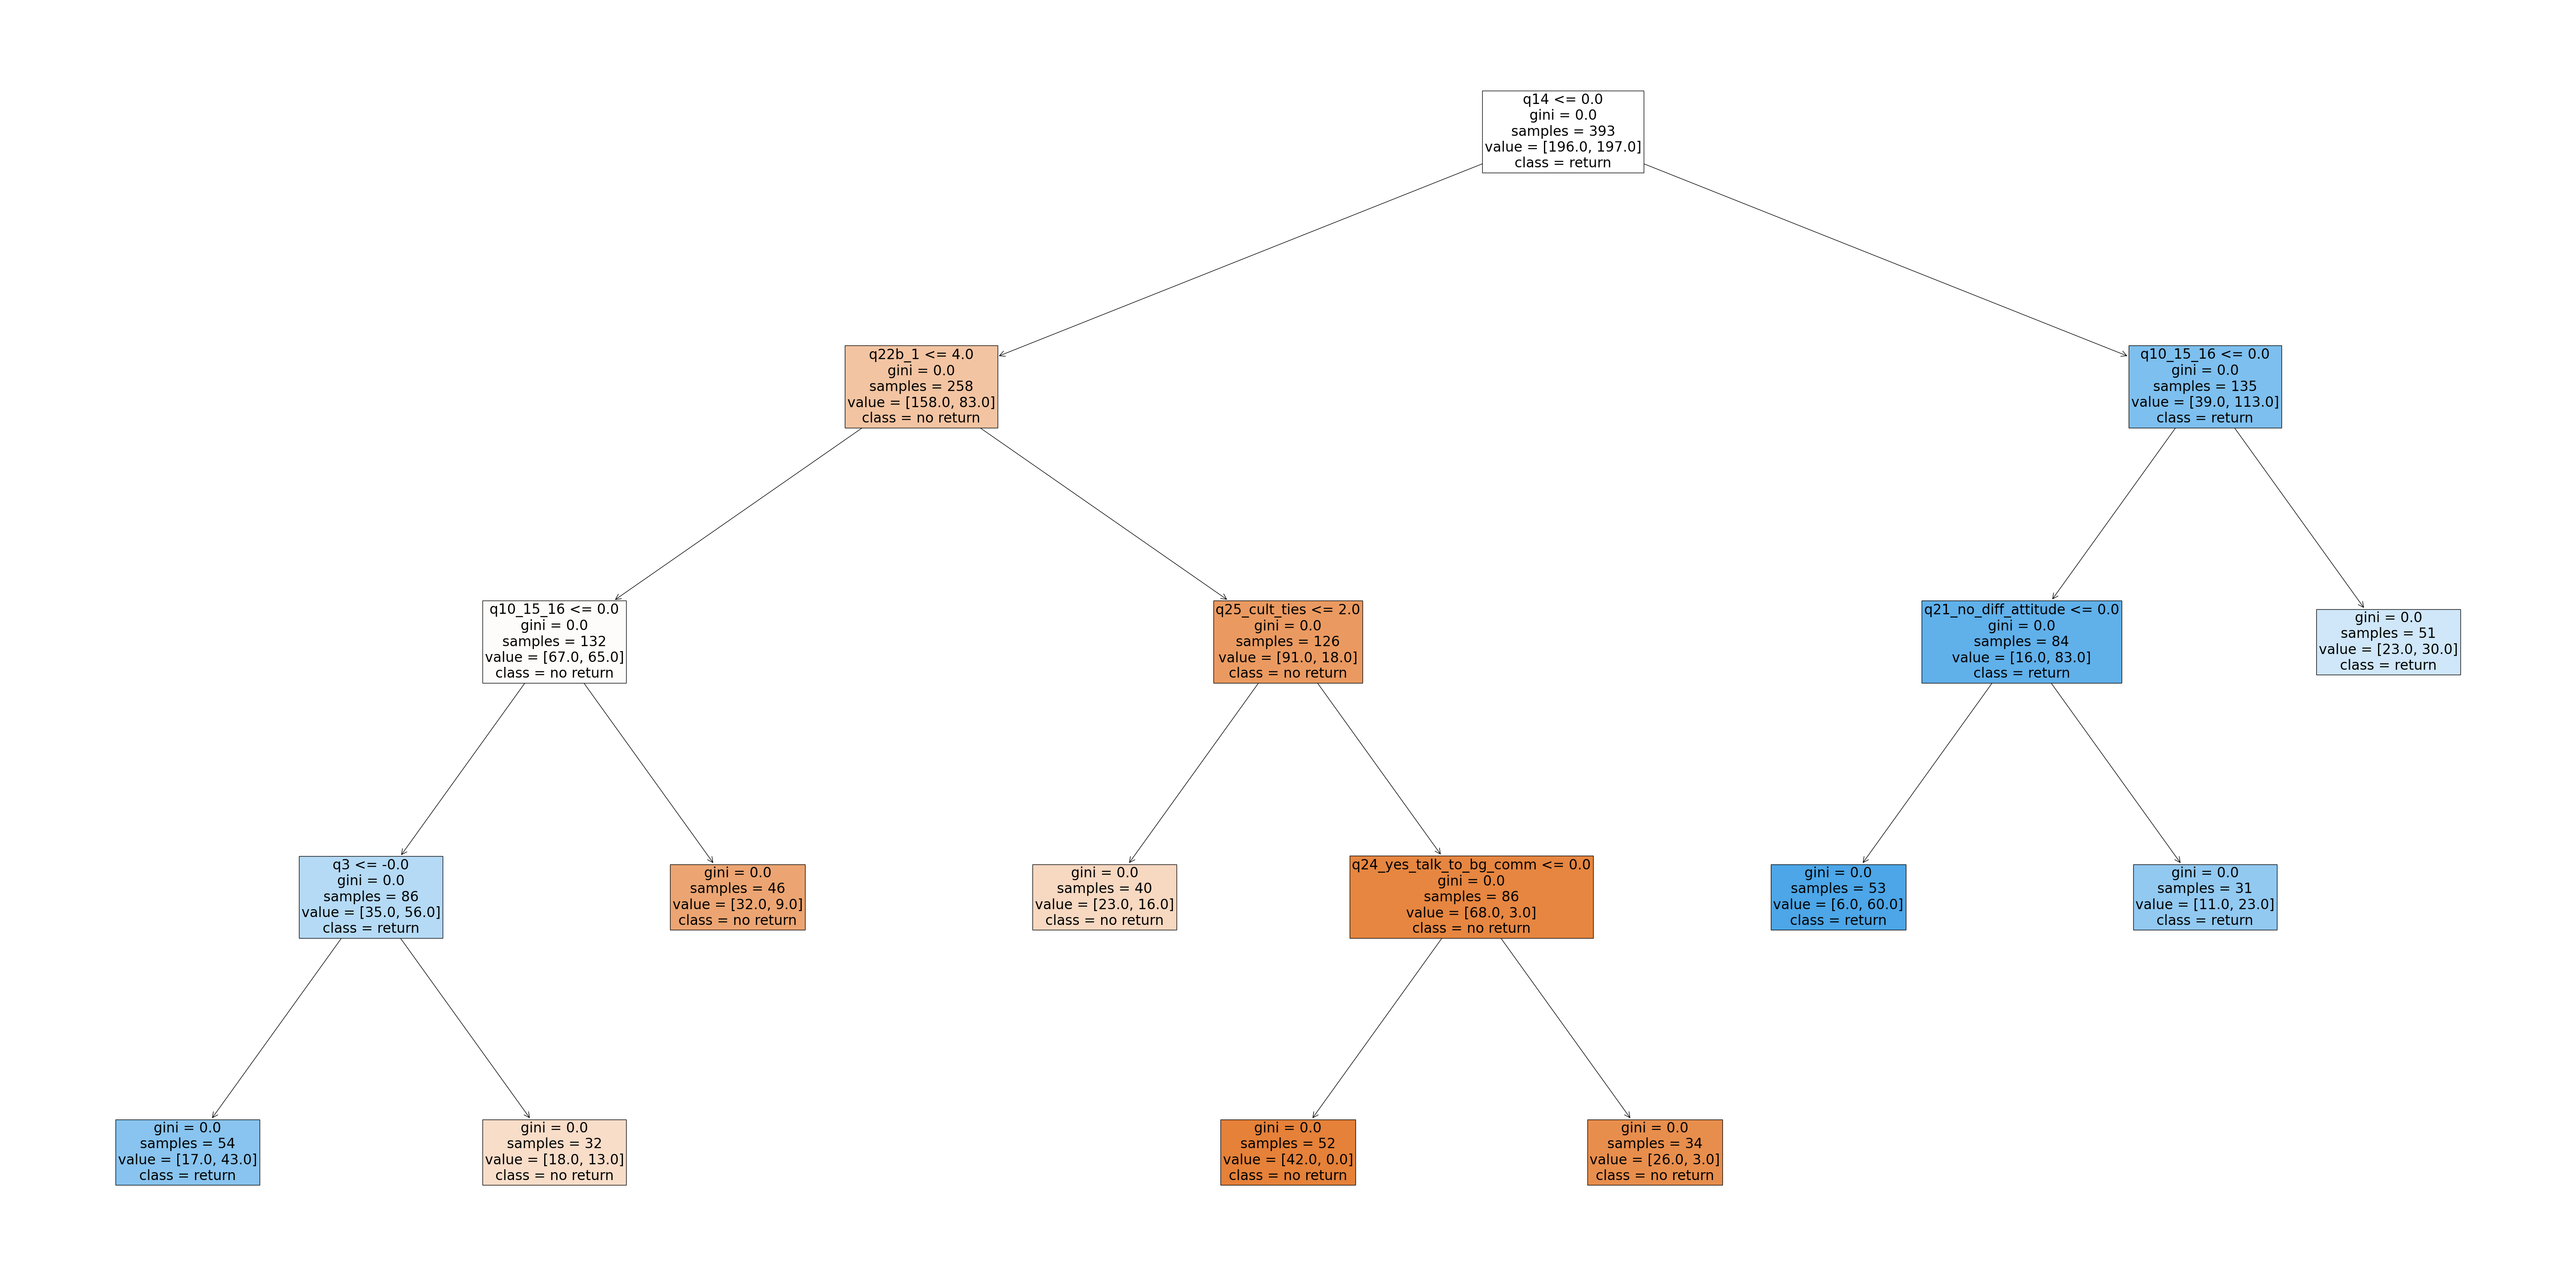

In [50]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 9, class_weight = "balanced", criterion = 'gini')
#clf = DecisionTreeClassifier(max_depth = 5, min_samples_split = 11, class_weight = "balanced", criterion = 'gini')
clf = DecisionTreeClassifier(max_depth = 5, min_samples_split = 12, min_samples_leaf = 30,  class_weight = "balanced", criterion = 'gini')
# Train Decision Tree Classifer
clf = clf.fit(X_train_clean,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test_clean)

print("Validation accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print('Validation AUC:', roc_auc_score(y_test,y_pred_dt)) # 0.8811708345266771

# Vizualization 
from sklearn import tree
fig = plt.figure(figsize=(80, 40))
_ = tree.plot_tree(clf, 
                   feature_names=X_train_clean.columns,  
                   class_names= ["no return", "return"], 
                   filled=True,  fontsize=24, precision = 0 )

# cmap = plt.get_cmap('viridis')
# #cmap = ['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']
# labels = ["no return", "return"]
# # Plot the legend
# patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=cmap(i/float(len(labels)-1)),
#             label="{:s}".format(labels[i]))[0]  for i in range(len(labels))]
# plt.legend(handles=patches, bbox_to_anchor=(0.8, 1), loc='upper left', ncol=1, fontsize=30)

#plt.savefig('decision_tree_map.pdf', bbox_inches='tight',  dpi=600)
#plt.show()

In [51]:
import pydotplus
from sklearn import tree
import collections
import graphviz

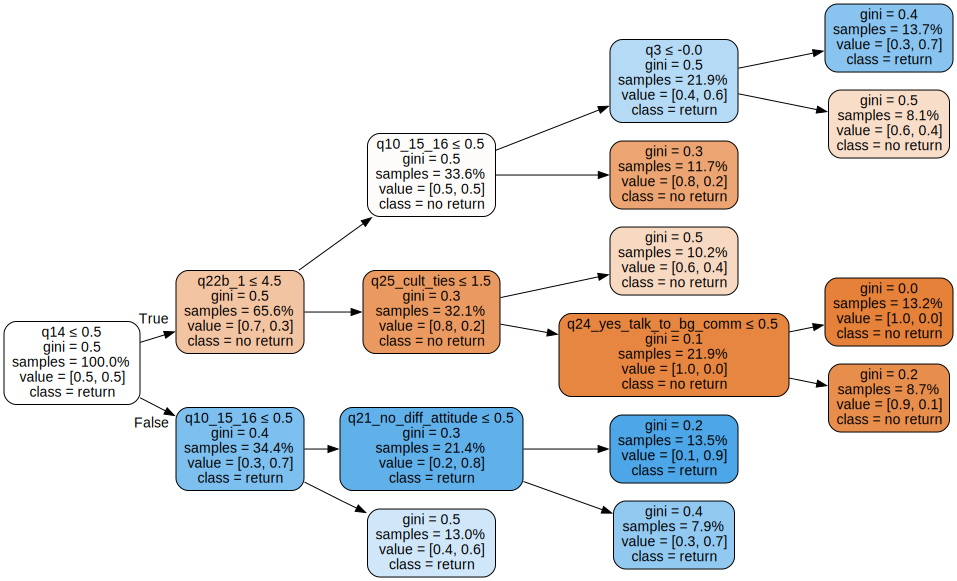

In [52]:

os.getcwd()
os.pathsep

# Make sure Graphiz/bin is added to the directory, so he graphiz package to run!!!
os.environ["PATH"] += os.pathsep + 'C:\Program Files/Graphviz/bin'

dot_data_1 = tree.export_graphviz(clf, out_file=None, 
                                  #feature_names= final_subset_df.Question.to_list(),   
                                  feature_names= X_train_clean.columns,  
                                  class_names= ["no return", "return"],  
                                  filled=True, rounded=True,  
                                  special_characters=True,
                                  precision = 1, 
                                  proportion = True, 
                                  rotate = True)  

graph = pydotplus.graph_from_dot_data(dot_data_1)

#graph.write_pdf('tree.pdf')

graph = graphviz.Source(dot_data_1)  
graph 



In [53]:
# y_train["return"]
text_representation = tree.export_text(clf, feature_names = X_train_clean.columns.to_list() )
print(text_representation)

|--- q14 <= 0.50
|   |--- q22b_1 <= 4.50
|   |   |--- q10_15_16 <= 0.50
|   |   |   |--- q3 <= -0.02
|   |   |   |   |--- class: 1.0
|   |   |   |--- q3 >  -0.02
|   |   |   |   |--- class: 0.0
|   |   |--- q10_15_16 >  0.50
|   |   |   |--- class: 0.0
|   |--- q22b_1 >  4.50
|   |   |--- q25_cult_ties <= 1.50
|   |   |   |--- class: 0.0
|   |   |--- q25_cult_ties >  1.50
|   |   |   |--- q24_yes_talk_to_bg_comm <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- q24_yes_talk_to_bg_comm >  0.50
|   |   |   |   |--- class: 0.0
|--- q14 >  0.50
|   |--- q10_15_16 <= 0.50
|   |   |--- q21_no_diff_attitude <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- q21_no_diff_attitude >  0.50
|   |   |   |--- class: 1.0
|   |--- q10_15_16 >  0.50
|   |   |--- class: 1.0



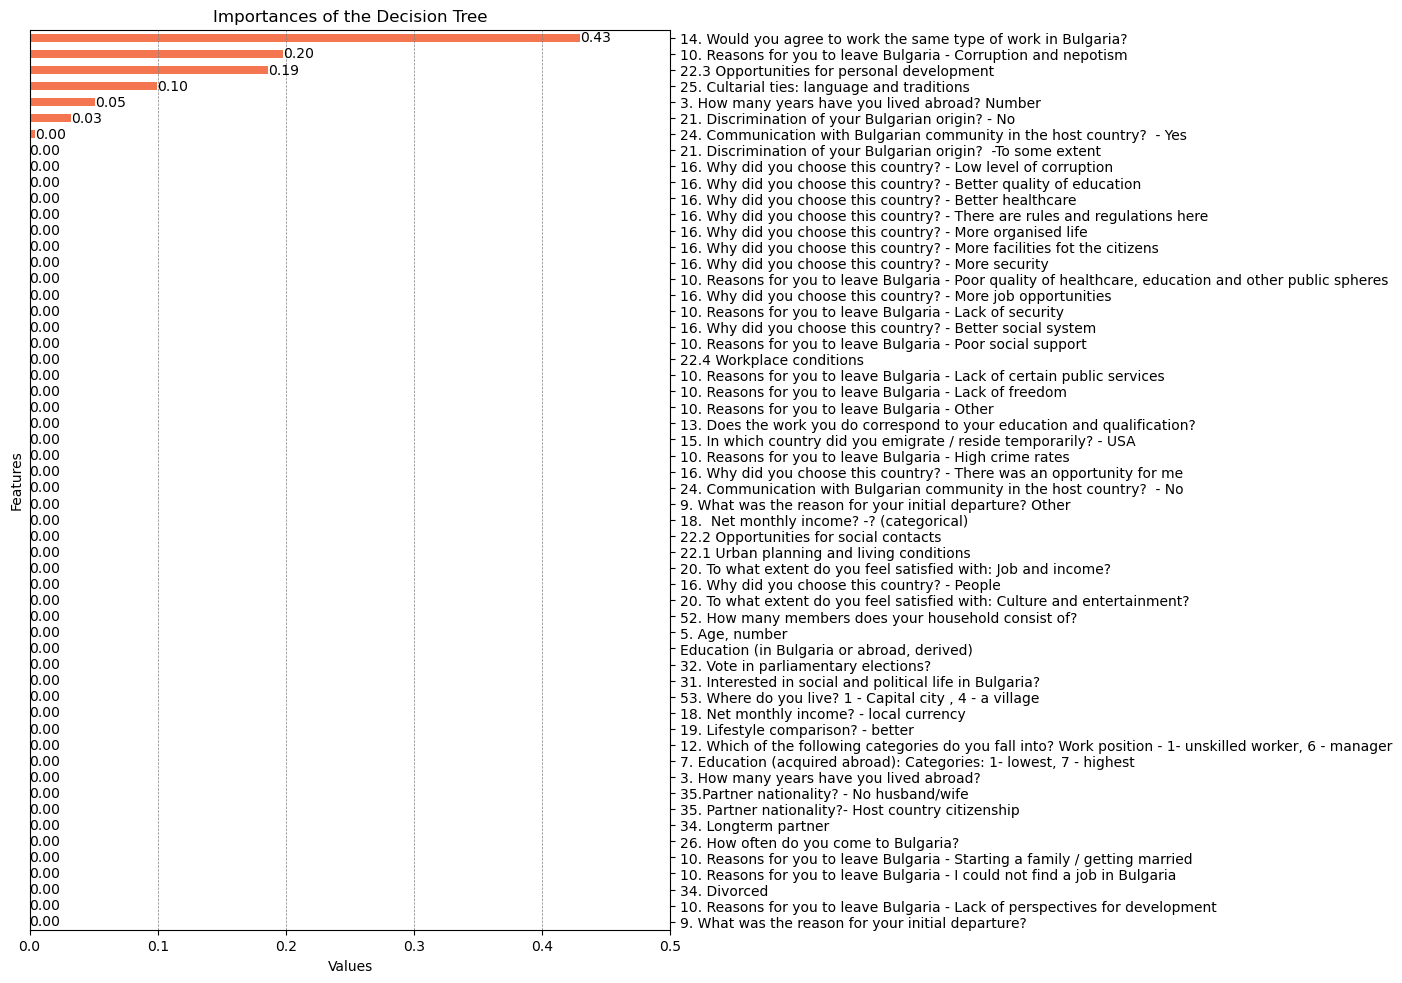

In [54]:
######  PLOT WITH THE ######

coef_df = pd.DataFrame( { "question": X_train_clean.columns, 'imp': clf.feature_importances_ }).sort_values(by = 'imp', ascending = False)
coef_df

try_df= coef_df.merge(map_variables, left_on = 'question', right_on = 'Variable', how = 'left')[["Variable", "Question", "imp"]].sort_values(by = 'imp', ascending = False)
try_df.set_index(try_df['Question'], inplace = True)

import seaborn as sns
#sns.set_context("talk") # {paper, notebook, talk, poster}
#sns.set_style("whitegrid")

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True 
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

#imp_coef = x[0].sort_values(ascending = False)
imp_coef = try_df['imp'].sort_values(ascending = True)
import matplotlib
plt.figure(figsize=(8.27, 11.69))
matplotlib.rcParams['figure.figsize'] = (8.27, 11.69)
#figsize=(8.27, 11.69)
ax = imp_coef.plot(kind = "barh",
              color=(imp_coef > 0).map({True: '#f37651',False: '#701f57'})
             )
# Plot parameters
plt.title("Importances of the Decision Tree")
plt.xlabel('Values')
plt.ylabel('Features')

# Adds the values on the bars 
ax.bar_label(ax.containers[0], fmt='%.2f',label_type = 'edge', color = 'black' )

plt.xlim(0,0.5)
plt.grid(visible=None, which='major', axis='x', color='grey', linestyle='--', linewidth=0.5) # adds the grid 

plt.savefig('feature_importance_logit_dt.png', bbox_inches='tight',  dpi=600) 
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [55]:
sum(clf.feature_importances_.tolist()) # the sum is 0

1.0

<Figure size 827x1169 with 0 Axes>

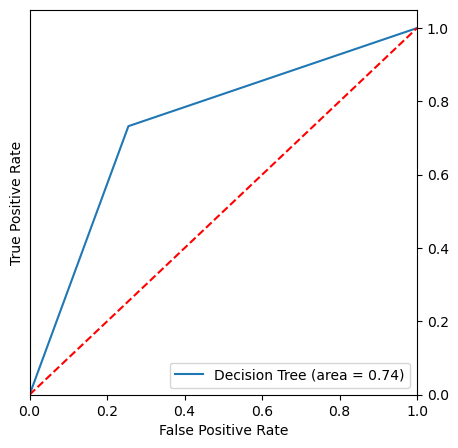

In [56]:
logit_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.figure()
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.savefig("roc_logit_dt.png")
plt.show()

In [57]:
#display(confusion_matrix(y_test, pred_proba_brf))
#pred_logity_test
pred = np.array(y_pred_dt > 0.5, dtype=float)
confusion_table = np.histogram2d(y_test.iloc[:,0], pred, bins=2)[0]
confusion_table

df_conf = pd.DataFrame(confusion_table)
df_conf.columns = ['Predicted as class 0', 'Predicted as class 1']
df_conf.index = ['Actual class 0', 'Actual class 1']
df_conf['Predicted as class 0'] = df_conf['Predicted as class 0'].astype(int)
df_conf['Predicted as class 1'] = df_conf['Predicted as class 1'].astype(int)
print(df_conf.to_latex())
df_conf

\begin{tabular}{lrr}
\toprule
{} &  Predicted as class 0 &  Predicted as class 1 \\
\midrule
Actual class 0 &  73 &  25 \\
Actual class 1 &  19 &  52 \\
\bottomrule
\end{tabular}



C:\Users\marij\AppData\Local\Temp\ipykernel_8884\553885251.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_conf.to_latex())


,Predicted as class 0,Predicted as class 1
Actual class 0,73,25
Actual class 1,19,52


In [58]:
from sklearn.metrics import classification_report

print(round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2).to_latex())
round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2)

\begin{tabular}{lrrrrr}
\toprule
{} &    0.0 &    1.0 &  accuracy &  macro avg &  weighted avg \\
\midrule
precision &  0.79 &  0.68 &  0.74 &  0.73 &  0.74 \\
recall    &  0.74 &  0.73 &  0.74 &  0.74 &  0.74 \\
f1-score  &  0.77 &  0.70 &  0.74 &  0.74 &  0.74 \\
support   &  98.00 &  71.00 &  0.74 &  169.00 &  169.00 \\
\bottomrule
\end{tabular}



C:\Users\marij\AppData\Local\Temp\ipykernel_8884\4044762601.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2).to_latex())


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.79,0.68,0.74,0.73,0.74
recall,0.74,0.73,0.74,0.74,0.74
f1-score,0.77,0.70,0.74,0.74,0.74
support,98.00,71.00,0.74,169.00,169.00


In [59]:
#print(clf.feature_importances_) 
featureImpList= []

for feat, importance in zip(X_train_clean.columns, clf.feature_importances_):  
    temp = [feat, importance]
   # print(temp)
    featureImpList.append(temp)

fT_df = round(pd.DataFrame(featureImpList, columns = ['Feature', 'Importance']),2)
display(fT_df.sort_values('Importance', ascending = False).head(10))

,Feature,Importance
11,q14,0.43
49,q10_15_16,0.20
39,q22b_1,0.19
55,q25_cult_ties,0.10
45,q3,0.05
26,q21_no_diff_attitude,0.03
41,q31,0.00
31,q34_longterm_partner,0.00
32,q35_host_country,0.00
33,q35_no_husband/wife,0.00


In [60]:
len(X_train_clean.columns)

56

# Random forest

In [61]:
# Random forest
from imblearn.ensemble import BalancedRandomForestClassifier

## Paramter tuning

C:\Users\marij\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


CV scores mean (training): [0.8703692  0.8784126  0.87986097 0.87995675 0.88073704 0.88395581
 0.88419187 0.88404977 0.88281684 0.88327304]
CV scores mean (validation): [0.82581875 0.83077986 0.83075    0.83169097 0.83467222 0.83165139
 0.83578333 0.83767083 0.83291875 0.83517569]


(0.8, 0.9)

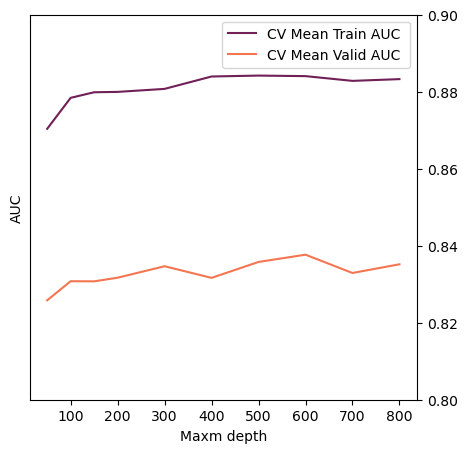

In [62]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
plt.figure(figsize=(5,5)) 
# Define the model
rfc = BalancedRandomForestClassifier(random_state=0,n_jobs=-1)

# Define the hyperparameters to be tuned, use the previous tree as a start
param_grid = {
    'n_estimators': [50,  100, 150, 200, 300,  400,  500, 600, 700, 800],
    'max_depth': [5],
    'min_samples_split': [12],
    'min_samples_leaf': [30]
}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, return_train_score = True )
grid_search.fit(X_train_clean, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the mean and standard deviation of the cross-validation scores for training and validation sets
cv_results = grid_search.cv_results_

cv_scores_mean_validation = cv_results['mean_test_score']
cv_scores_mean_train = cv_results['mean_train_score']

print(f"CV scores mean (training): {cv_scores_mean_train}")
# print(f"CV scores standard deviation (training): {cv_scores_std_train}")
print(f"CV scores mean (validation): {cv_scores_mean_validation}")
# print(f"CV scores standard deviation (validation): {cv_scores_std_validation}")

d = pd.DataFrame({"cv_scores_mean_train":pd.Series(cv_scores_mean_train), "cv_scores_mean_validation":pd.Series(cv_scores_mean_validation),
                                         "number_trees":pd.Series([50,  100, 150, 200, 300,  400,  500, 600, 700, 800])})# visualizing changes in parameters
    
plt.plot("number_trees","cv_scores_mean_train", data=d, label="CV Mean Train AUC ", color =  '#701f57')
plt.plot("number_trees","cv_scores_mean_validation", data=d, label="CV Mean Valid AUC", color = '#f37651')
plt.xlabel("Maxm depth")
plt.legend()
plt.ylabel("AUC")
plt.ylim(0.80, 0.9) # sets the y axis limits

In [63]:
# 300 trees have been chosen not to overfit, based on the graph.

## Fit the model

In [64]:
# Fitting the model 
clf = BalancedRandomForestClassifier(n_estimators=300, max_depth = 5, min_samples_split = 12 , min_samples_leaf = 30, random_state=0,n_jobs=-1, verbose = 10 , sampling_strategy = 1)
model_brf = clf.fit(X_train_clean, y_train) 

# Predictions for the valdiation dataset 
pred_proba_brf = model_brf.predict_proba(X_test_clean)
pred_brf = model_brf.predict(X_test_clean)
# Evaluation 
print('Validation AUC:',roc_auc_score(y_test,pred_proba_brf[:, 1])) 

C:\Users\marij\AppData\Local\Temp\ipykernel_8884\696775926.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_brf = clf.fit(X_train_clean, y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 2 of 300
building tree 1 of 300
building tree 3 of 300
building tree 5 of 300
building tree 7 of 300
building tree 8 of 300
building tree 4 of 300
building tree 6 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 13 of 300
building tree 16 of 300
building tree 15 of 300
building tree 17 of 300
building tree 12 of 300
building tree 18 of 300
building tree 19 of 300
building tree 14 of 300
building tree 20 of 300
building tree 22 of 300
building tree 21 of 300
building tree 24 of 300
building tree 23 of 300
building tree 26 of 300
building tree 27 of 300
building tree 25 of 300
building tree 28 of 300
building tree 32 of 300
building tree 31 of 300
building tree 29 of 300
building tree 33 of 300
building tree 30 of 300
building tree 35 of 300
building tree 34 of 300
building tree 36 of 300
building tree 37 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 38 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.2s


building tree 92 of 300building tree 93 of 300

building tree 94 of 300
building tree 95 of 300
building tree 97 of 300
building tree 96 of 300
building tree 99 of 300
building tree 98 of 300
building tree 101 of 300
building tree 100 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 106 of 300
building tree 105 of 300
building tree 109 of 300
building tree 110 of 300
building tree 107 of 300
building tree 108 of 300
building tree 111 of 300
building tree 112 of 300
building tree 114 of 300
building tree 113 of 300
building tree 115 of 300
building tree 116 of 300
building tree 118 of 300
building tree 117 of 300
building tree 120 of 300
building tree 119 of 300
building tree 123 of 300
building tree 121 of 300
building tree 122 of 300
building tree 125 of 300
building tree 127 of 300
building tree 126 of 300
building tree 128 of 300
building tree 124 of 300
building tree 132 of 300
building tree 129 of 300
building tree 133 of 300
building

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s


building tree 182 of 300
building tree 181 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 188 of 300
building tree 187 of 300
building tree 190 of 300
building tree 189 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 195 of 300
building tree 196 of 300
building tree 194 of 300
building tree 198 of 300
building tree 197 of 300
building tree 199 of 300
building tree 200 of 300
building tree 202 of 300
building tree 201 of 300
building tree 204 of 300
building tree 203 of 300
building tree 205 of 300
building tree 207 of 300
building tree 206 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 214 of 300
building tree 212 of 300
building tree 213 of 300
building tree 215 of 300
building tree 216 of 300
building tree 218 of 300
building tree 217 of 300
building tree 219 of 300
building tree 220 of 300


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    0.6s


building tree 249 of 300
building tree 251 of 300
building tree 253 of 300
building tree 254 of 300
building tree 257 of 300
building tree 256 of 300
building tree 255 of 300
building tree 258 of 300
building tree 260 of 300
building tree 261 of 300
building tree 259 of 300
building tree 264 of 300
building tree 262 of 300
building tree 263 of 300
building tree 265 of 300
building tree 267 of 300
building tree 266 of 300
building tree 268 of 300
building tree 270 of 300
building tree 269 of 300
building tree 271 of 300
building tree 274 of 300
building tree 272 of 300
building tree 273 of 300
building tree 276 of 300
building tree 277 of 300
building tree 275 of 300
building tree 279 of 300
building tree 280 of 300
building tree 278 of 300
building tree 282 of 300
building tree 281 of 300
building tree 283 of 300
building tree 287 of 300
building tree 284 of 300
building tree 285 of 300
building tree 288 of 300
building tree 286 of 300
building tree 290 of 300
building tree 293 of 300


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   

Validation AUC: 0.8669157803966656


[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 226 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


In [65]:
# sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores

In [66]:
print('Validation AUC:', roc_auc_score(y_test,pred_proba_brf[:, 1])) 
print("Validation accuracy:",metrics.accuracy_score(y_test, pred_brf))


Validation AUC: 0.8669157803966656
Validation accuracy: 0.757396449704142


<Figure size 827x1169 with 0 Axes>

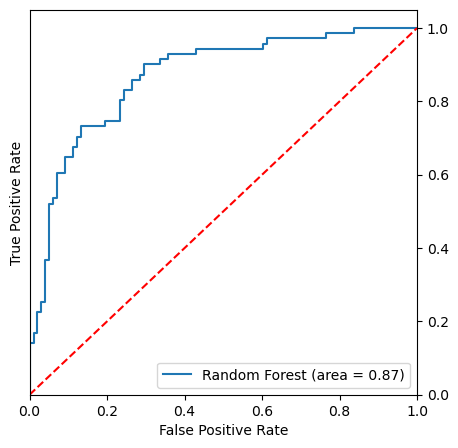

In [67]:
logit_roc_auc = roc_auc_score(y_test, pred_proba_brf[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_brf[:, 1])
plt.figure()
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

#plt.savefig("roc_logit_rf.png")
plt.show()

In [68]:
#display(confusion_matrix(y_test, pred_proba_brf))
#pred_logity_test
pred = np.array(pred_proba_brf[:,1] > 0.5, dtype=float)
confusion_table = np.histogram2d(y_test.iloc[:,0], pred, bins=2)[0]
confusion_table

array([[75., 23.],
       [18., 53.]])

In [69]:
df_conf = pd.DataFrame(confusion_table)
df_conf.columns = ['Predicted as class 0', 'Predicted as class 1']
df_conf.index = ['Actual class 0', 'Actual class 1']
df_conf['Predicted as class 0'] = df_conf['Predicted as class 0'].astype(int)
df_conf['Predicted as class 1'] = df_conf['Predicted as class 1'].astype(int)
#print(df_conf.to_latex())
df_conf

,Predicted as class 0,Predicted as class 1
Actual class 0,75,23
Actual class 1,18,53


In [70]:
from sklearn.metrics import classification_report

#print(round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2).to_latex())
round(pd.DataFrame(classification_report(y_test,pred, output_dict = True)),2)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.81,0.70,0.76,0.75,0.76
recall,0.77,0.75,0.76,0.76,0.76
f1-score,0.79,0.72,0.76,0.75,0.76
support,98.00,71.00,0.76,169.00,169.00


In [71]:
#print(clf.feature_importances_) 
featureImpList= []

for feat, importance in zip(X_train_clean.columns, model_brf.feature_importances_):  
    temp = [feat, importance*100]
   # print(temp)
    featureImpList.append(temp)

fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])
display(fT_df.sort_values('Importance', ascending = False).head(25))
display(fT_df.sort_values('Importance', ascending = False).tail(25))
#fT_df.to_csv("random_forest_feature_importances.csv")

,Feature,Importance
11,q14,16.899757
48,q20_7_8,9.753384
41,q31,6.303581
54,q22c,5.246633
39,q22b_1,4.872448
49,q10_15_16,4.830414
40,q26,4.357865
29,q24_yes_talk_to_bg_comm,3.213487
53,q22_a,2.985362
21,q16_12,2.418456


,Feature,Importance
50,q16_people,0.780056
3,q10_8,0.741658
22,q16_13,0.727785
35,q7,0.632081
32,q35_host_country,0.623079
18,q16_9,0.612879
44,education,0.509076
13,q16_2,0.482720
28,q24_no_talk_to_bg_comm,0.478330
47,q52_rec,0.426652


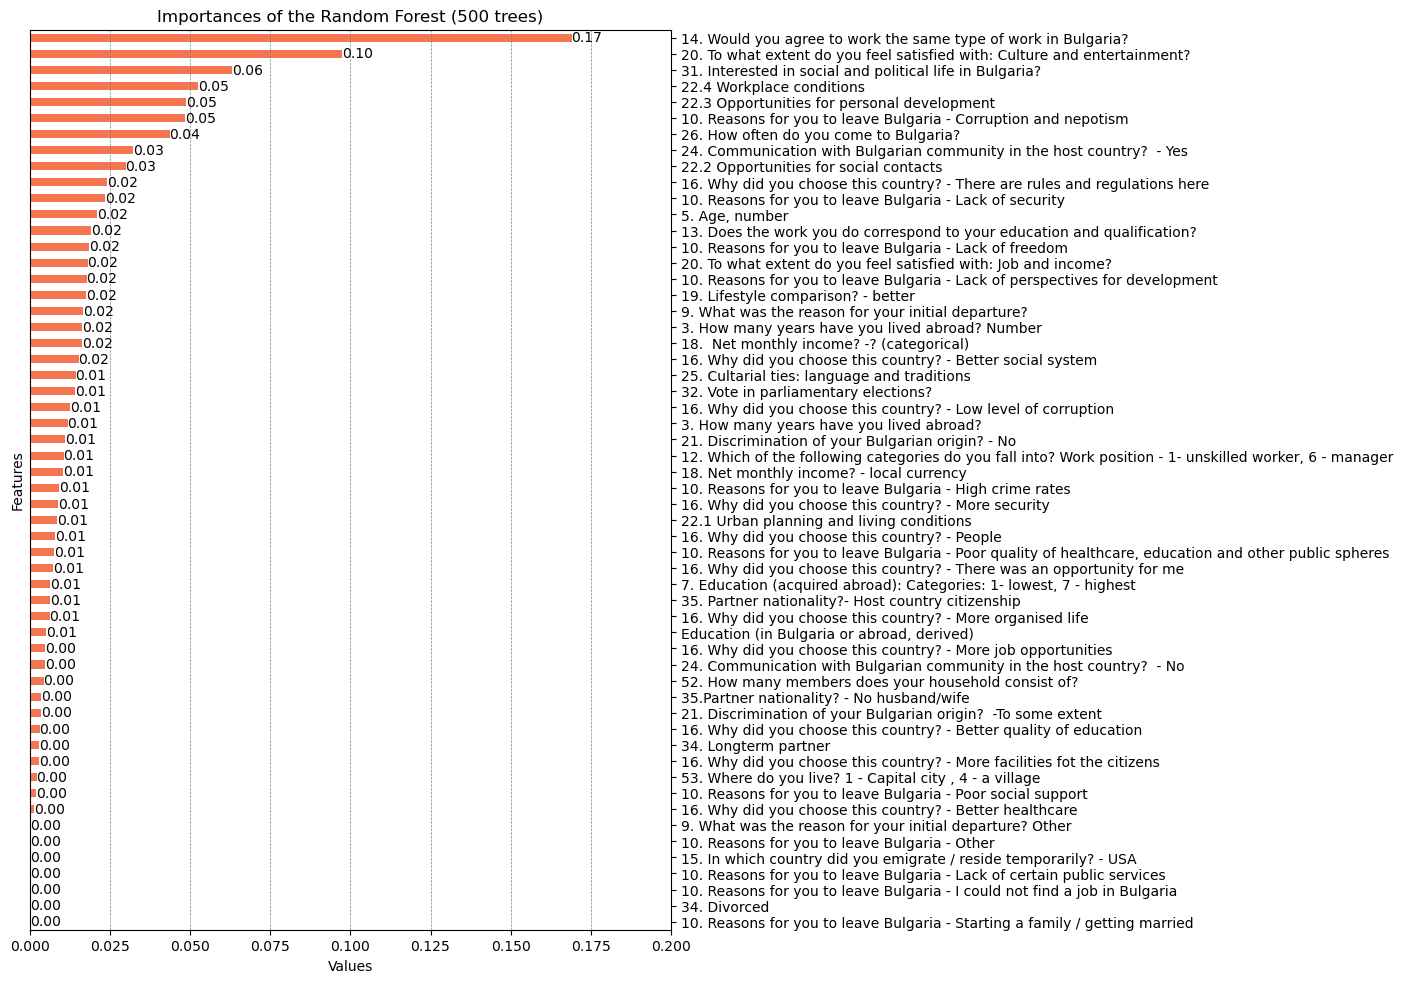

In [72]:
######  PLOT WITH THE ######

coef_df = pd.DataFrame( { "question": X_train_clean.columns, 'imp': model_brf.feature_importances_ }).sort_values(by = 'imp', ascending = False)
coef_df

try_df= coef_df.merge(map_variables, left_on = 'question', right_on = 'Variable', how = 'inner')[["Variable", "Question", "imp"]].sort_values(by = 'imp', ascending = False)
try_df.set_index(try_df['Question'], inplace = True)

import seaborn as sns
#sns.set_context("talk") # {paper, notebook, talk, poster}
#sns.set_style("whitegrid")

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True 
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

#imp_coef = x[0].sort_values(ascending = False)
imp_coef = try_df['imp'].sort_values(ascending = True)
import matplotlib
plt.figure(figsize=(8.27, 11.69))
matplotlib.rcParams['figure.figsize'] = (8.27, 11.69)
#figsize=(8.27, 11.69)
ax = imp_coef.plot(kind = "barh",
              color=(imp_coef > 0).map({True: '#f37651',False: '#701f57'})
             )
# Plot parameters
plt.title("Importances of the Random Forest (500 trees)")
plt.xlabel('Values')
plt.ylabel('Features')

# Adds the values on the bars 
ax.bar_label(ax.containers[0], fmt='%.2f',label_type = 'edge', color = 'black' )

plt.xlim(0,0.2)
plt.grid(visible=None, which='major', axis='x', color='grey', linestyle='--', linewidth=0.5) # adds the grid 

#plt.savefig('feature_importance_logit_rf.png', bbox_inches='tight',  dpi=600) 

In [73]:
print("All models ran successfully!!!")

All models ran successfully!!!
